In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.optimize
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
d = pd.read_csv('data/temperature.csv')

In [4]:
d.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
1,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
3,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
4,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5
5,2012-10-01 18:00:00,284.620868,282.117710,289.417494,281.767681,291.846821,291.572917,293.359284,296.700424,285.472132,...,286.037673,288.564730,285.887208,287.368410,306.652574,304.150361,310.158846,304.4,304.4,303.5
6,2012-10-01 19:00:00,284.618824,282.126324,289.403119,281.760297,291.841480,291.582772,293.348320,296.723403,285.551525,...,286.131290,288.643994,285.900348,287.413990,306.406261,304.106534,310.074615,304.4,304.4,303.5
7,2012-10-01 20:00:00,284.616781,282.134939,289.388745,281.752912,291.836139,291.592626,293.337356,296.746381,285.630919,...,286.224906,288.723257,285.913487,287.459569,306.159948,304.062708,309.990385,304.4,304.4,303.5
8,2012-10-01 21:00:00,284.614738,282.143553,289.374370,281.745528,291.830798,291.602480,293.326392,296.769360,285.710312,...,286.318522,288.802521,285.926627,287.505149,305.913635,304.018881,309.906154,304.4,304.4,303.5
9,2012-10-01 22:00:00,284.612694,282.152168,289.359995,281.738144,291.825457,291.612334,293.315428,296.792339,285.789705,...,286.412139,288.881784,285.939767,287.550728,305.667322,303.975054,309.821923,304.4,304.4,303.5


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45252 entries, 0 to 45251
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45252 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

In [284]:
d = d.iloc[0:3000]
df = d[['Denver', 'Albuquerque', 'Detroit']]
#df.head(10)

In [285]:
df

,Denver,Albuquerque,Detroit
0,284.610000,285.120000,284.030000
1,284.607306,285.154558,284.069789
2,284.599918,285.233952,284.173965
3,284.592530,285.313345,284.278140
4,284.585142,285.392738,284.382316
...,...,...,...
2995,269.680000,277.150000,262.220000
2996,269.050000,276.150000,262.970000
2997,269.050000,273.785000,262.970000
2998,269.050000,271.420000,262.970000


In [8]:
def cut_tails(array):
    array_cut = []
    q25 = np.percentile(array, 25)
    q75 = np.percentile(array, 75)
    interval = q75 - q25
    
    min_dist = q25 - (1.5 * interval)
    max_dist = q75 + (1.5 * interval)
    
    for data in array:
        #print(data)
        if data < max_dist and data > min_dist:
            array_cut.append(data)
    return array_cut

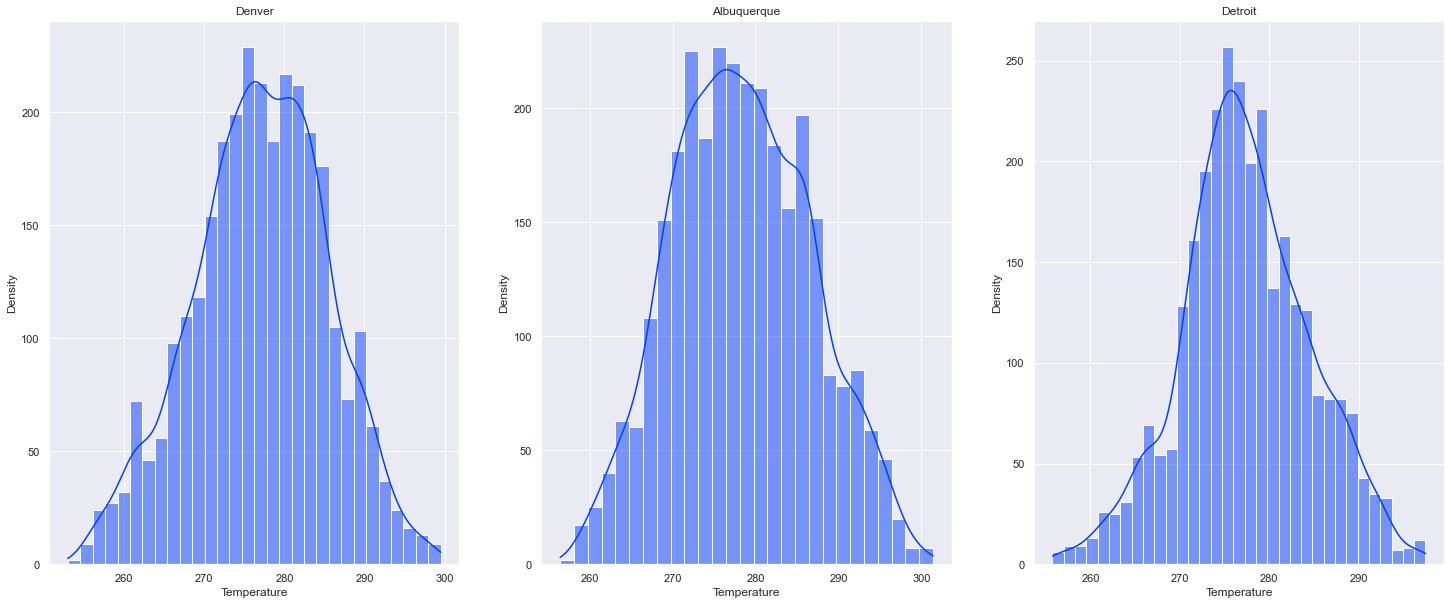

In [350]:
figure, ax = plt.subplots(1, 3, figsize=(25, 10))
sns.set_theme(style='darkgrid', palette='bright')

Denver = sns.histplot(df.Denver, ax=ax[0], kde=True)
Denver.set(xlabel='Temperature', ylabel='Density', title='Denver')

Albuquerque = sns.histplot(df.Albuquerque, ax=ax[1], kde=True)
Albuquerque.set(xlabel='Temperature', ylabel='Density', title='Albuquerque')

Detroit = sns.histplot(df.Detroit, ax=ax[2], kde=True)
Detroit.set(xlabel='Temperature', ylabel='Density', title='Detroit')

#Toronto = sns.histplot(df.Toronto, ax=ax[1, 1], kde=True)
#Toronto.set(xlabel='Temperature', ylabel='Density', title='Toronto')

plt.show()

In [11]:
def return_quantile(array):
    return np.array([
        #np.quantile(array, 0.1),
        np.quantile(array, 0.25),
        np.quantile(array, 0.5),
        np.quantile(array, 0.75),
        #np.quantile(array, 0.9)
    ])

def plot_box(array, label):
    figure, ax = plt.subplots(figsize=(10, 5))
    sns.set_theme(style='darkgrid', palette='bright')
    
    boxplot = sns.boxplot(array, linewidth=0.5)
    boxplot.set(title=label)
    
    quantiles = return_quantile(array)
    for quantile in quantiles:
        plt.axvline(quantile, color='black', linestyle='--')
    
    plt.show()

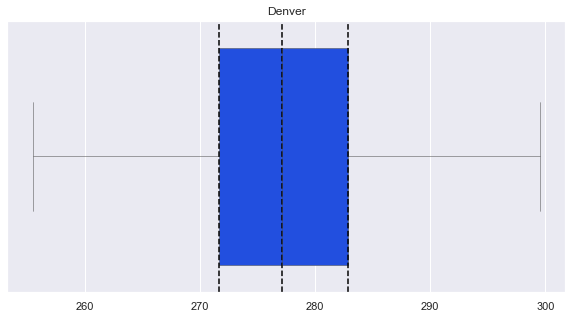

Статистическое описание случайной величины Denver:


count    2997.000000
mean      277.073223
std         8.353157
min       255.460000
25%       271.620000
50%       277.165000
75%       282.900000
max       299.530000
dtype: float64

In [351]:
plot_box(cut_tails(df.Denver), 'Denver')
#print(return_quantile(df.Denver))
print("Статистическое описание случайной величины Denver:")
pd.Series(cut_tails(df.Denver)).describe()


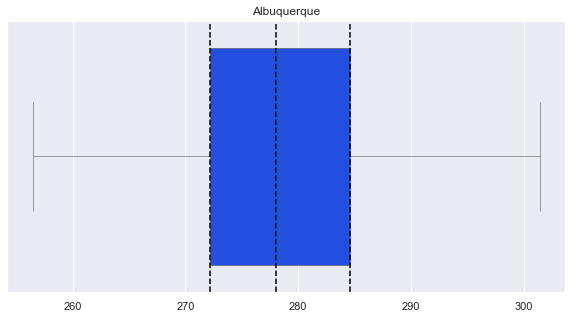

Статистическое описание случайной величины Albuquerque:


count    3000.000000
mean      278.401010
std         8.353599
min       256.453000
25%       272.220000
50%       278.050000
75%       284.542500
max       301.410000
dtype: float64

In [354]:
plot_box(cut_tails(df.Albuquerque), 'Albuquerque')

#print(return_quantile(df.Albuquerque))
print("Статистическое описание случайной величины Albuquerque:")
pd.Series(cut_tails(df.Albuquerque)).describe()

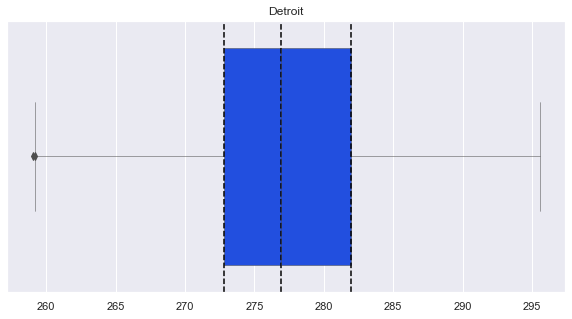

Статистическое описание случайной величины Detroit:


count    2968.000000
mean      277.395057
std         6.896222
min       259.010000
25%       272.830000
50%       276.910000
75%       281.943750
max       295.560000
dtype: float64

In [355]:
plot_box(cut_tails(df.Detroit), 'Detroit')

#print(return_quantile(df.Detroit))
print("Статистическое описание случайной величины Detroit:")
pd.Series(cut_tails(df.Detroit)).describe()

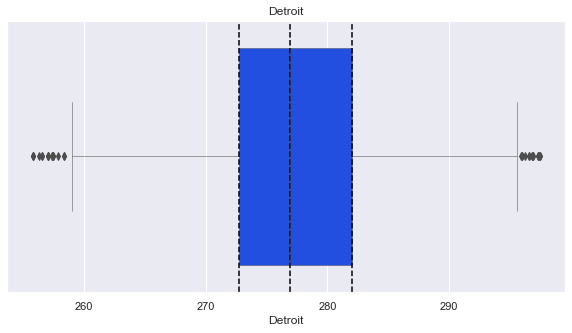

Статистическое описание случайной величины Detroit:


count    2968.000000
mean      277.395057
std         6.896222
min       259.010000
25%       272.830000
50%       276.910000
75%       281.943750
max       295.560000
dtype: float64

In [356]:
plot_box(df.Detroit, 'Detroit')

#print(return_quantile(df.Detroit))
print("Статистическое описание случайной величины Detroit:")
pd.Series(cut_tails(df.Detroit)).describe()

In [359]:
def return_distplot(array, label):
    figure = plt.subplots(figsize=(10, 5))
    sns.set_theme(style='darkgrid', palette='bright')
    
    subplot = sns.histplot(array, kde=False, stat='density')
    subplot.set(title=label)
    
    for distribution in ([scipy.stats.beta, scipy.stats.johnsonsb, scipy.stats.genlogistic]):
        x_plot = np.linspace(np.min(array), np.max(array), 100)
        args = distribution.fit(array)
        print('Распределение', type(distribution).__name__)
        print('Аргументы:', args)
        y_plot = distribution.pdf(x_plot, *args)
        
        sns.lineplot(x_plot, y_plot, label=type(distribution).__name__)
        plt.legend(fontsize=13)     

Распределение beta_gen
Аргументы: (8.21379717280913, 6.671524987701618, 240.1243480659225, 66.95397249839993)
Распределение johnsonsb_gen
Аргументы: (-0.4054890958688317, 2.145636655716606, 235.71809809534926, 75.9038307030799)
Распределение genlogistic_gen
Аргументы: (0.8781245649445995, 278.1499832821503, 4.579276003549394)


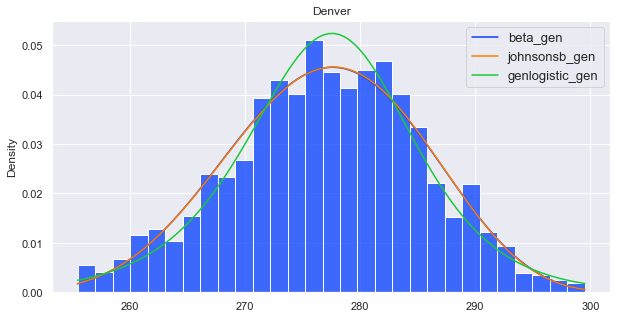

In [360]:
return_distplot(cut_tails(df.Denver), 'Denver')

Распределение beta_gen
Аргументы: (3.8864877381137335, 4.499029341526015, 254.62139221309076, 51.326036564234386)
Распределение johnsonsb_gen
Аргументы: (0.22483014087931585, 1.534621098880184, 252.10290782186348, 56.364332807312955)
Распределение genlogistic_gen
Аргументы: (1.8201264206170618, 273.47079477310683, 5.735582140428264)


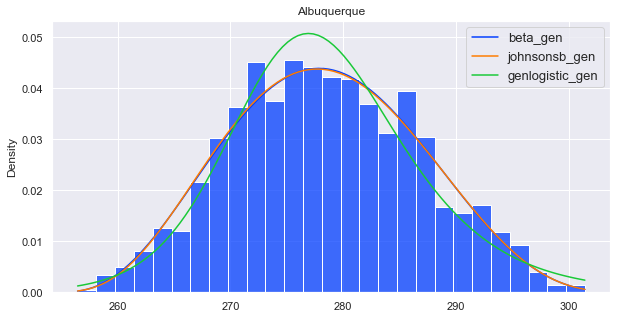

In [361]:
return_distplot(cut_tails(df.Albuquerque), 'Albuquerque')

Распределение beta_gen
Аргументы: (8.414585054643979, 8.873628973424236, 248.65881288837704, 59.044997357514816)
Распределение johnsonsb_gen
Аргументы: (0.14644659169312987, 2.4358288541940016, 243.4256452500289, 69.96223867822481)
Распределение genlogistic_gen
Аргументы: (1.3321311503160662, 275.52319135380645, 4.301889938369847)


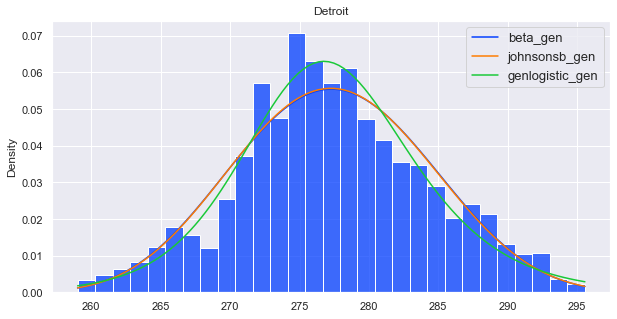

In [362]:
return_distplot(cut_tails(df.Detroit), 'Detroit')

In [427]:
array = cut_tails(df.Denver)
mle = scipy.stats.beta.fit(array, method='MLE')

#print('Distribution', type(scipy.stats.beta).__name__, 'arguments:', mle)

def function(x, a, b):
    return getattr(scipy.stats.distributions, 'beta').pdf(x, a, b)

xdata, ydata = np.histogram(array, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm')

print('Распределение', type(scipy.stats.beta).__name__)
print('Метод максимального правдоподобия:', '{:.3f}, {:.3f}'.format(mle[0], mle[1]))
print('LS метод: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Распределение beta_gen
Метод максимального правдоподобия: 8.214, 6.672
LS метод: 10.025, 1.889


In [464]:
array = cut_tails(df.Albuquerque)
mle = scipy.stats.johnsonsb.fit(array, method='MLE')

#print('Distribution', type(scipy.stats.johnsonsb).__name__, 'arguments:', mle)

def function(x, a, b):
    return getattr(scipy.stats.distributions, 'johnsonsb').pdf(x, a, b)

xdata, ydata = np.histogram(array, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm')

print('Распределение', type(scipy.stats.johnsonsb).__name__)
print('Метод максимального правдоподобия:', '{:.3f}, {:.3f}'.format(mle[0], mle[1]))
print('LS метод: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Распределение johnsonsb_gen
Метод максимального правдоподобия: 0.225, 1.535
LS метод: 8.116, 1.415


In [475]:
array = df.Detroit
mle = scipy.stats.genlogistic.fit(array, method='MLE')

#print('Distribution', type(scipy.stats.genlogistic).__name__, 'arguments:', mle)

def function(x, a, b):
    return getattr(scipy.stats.distributions, 'genlogistic').pdf(a, x, b)

ydata, xdata = np.histogram(array, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm')

print('Распределение', type(scipy.stats.genlogistic).__name__)
print('Метод максимального правдоподобия:', '{:.3f}, {:.3f}'.format(mle[0], mle[1]))
print('LS метод: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Распределение genlogistic_gen
Метод максимального правдоподобия: 1.228, 276.006
LS метод: 1.000, 1.000


In [438]:
def return_biplot(array, label, distribution):
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.set_theme(style='darkgrid', palette='bright')
    
    args = distribution.fit(array)
    print('Distribution', type(distribution).__name__, 'arguments:', args)
    scipy.stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[0].set_marker('.')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.title(label)
    plt.show()

Distribution beta_gen arguments: (8.21379717280913, 6.671524987701618, 240.1243480659225, 66.95397249839993)


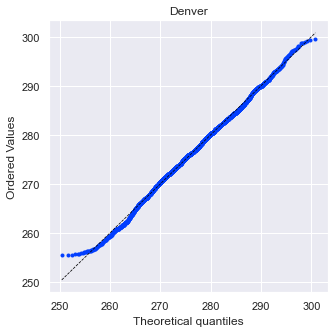

In [439]:
return_biplot(cut_tails(df.Denver), 'Denver', distribution=scipy.stats.beta)

Distribution johnsonsb_gen arguments: (0.22483014087931585, 1.534621098880184, 252.10290782186348, 56.364332807312955)


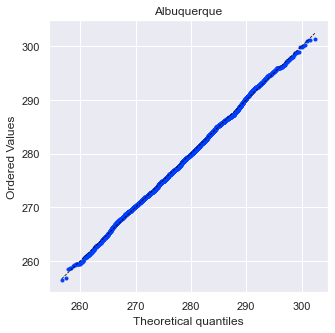

In [440]:
return_biplot(cut_tails(df.Albuquerque), 'Albuquerque', distribution=scipy.stats.johnsonsb)

Distribution genlogistic_gen arguments: (1.3321311503160662, 275.52319135380645, 4.301889938369847)


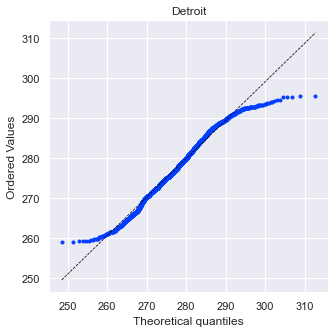

In [443]:
return_biplot(cut_tails(df.Detroit), 'Detroit', distribution=scipy.stats.genlogistic)

In [450]:
def return_test(array, distribution, cdf):
    args = distribution.fit(array)
    
    kstest = scipy.stats.kstest(array, cdf=cdf, args=args).pvalue
    cramervonmises = scipy.stats.cramervonmises(array, cdf=cdf, args=args).pvalue
    
    print('Колмогоров-Смирнов: {:.3f}'.format(kstest))
    print('Крамер фон-Мизес: {:.3f}'.format(cramervonmises))

In [451]:
cont_distr = [scipy.stats.alpha, scipy.stats.anglit, scipy.stats.arcsine, scipy.stats.argus, scipy.stats.beta, scipy.stats.betaprime, scipy.stats.bradford, scipy.stats.burr, scipy.stats.burr12, scipy.stats.cauchy, scipy.stats.chi, scipy.stats.chi2, scipy.stats.cosine, scipy.stats.crystalball, scipy.stats.dgamma, scipy.stats.dweibull, scipy.stats.erlang, scipy.stats.expon, scipy.stats.exponnorm, scipy.stats.exponweib, scipy.stats.exponpow, scipy.stats.f, scipy.stats.fatiguelife, scipy.stats.fisk, scipy.stats.foldcauchy, scipy.stats.foldnorm, scipy.stats.genlogistic, scipy.stats.gennorm, scipy.stats.genpareto, scipy.stats.genexpon, scipy.stats.genextreme, scipy.stats.gausshyper, scipy.stats.gamma, scipy.stats.gengamma, scipy.stats.genhalflogistic, scipy.stats.genhyperbolic, scipy.stats.gompertz, scipy.stats.gumbel_r, scipy.stats.gumbel_l, scipy.stats.halfcauchy, scipy.stats.halflogistic, scipy.stats.halfnorm, scipy.stats.halfgennorm, scipy.stats.hypsecant, scipy.stats.invgamma, scipy.stats.invgauss, scipy.stats.invweibull, scipy.stats.johnsonsb, scipy.stats.johnsonsu, scipy.stats.kappa4, scipy.stats.kappa3, scipy.stats.ksone, scipy.stats.kstwobign, scipy.stats.levy, scipy.stats.levy_l, scipy.stats.logistic, scipy.stats.loggamma, scipy.stats.loglaplace, scipy.stats.lognorm, scipy.stats.lomax, scipy.stats.maxwell, scipy.stats.mielke, scipy.stats.moyal, scipy.stats.nakagami, scipy.stats.ncx2, scipy.stats.ncf, scipy.stats.nct, scipy.stats.norm, scipy.stats.norminvgauss, scipy.stats.pareto, scipy.stats.pearson3, scipy.stats.powerlaw, scipy.stats.powerlognorm, scipy.stats.powernorm, scipy.stats.rdist, scipy.stats.rayleigh, scipy.stats.rice, scipy.stats.recipinvgauss, scipy.stats.semicircular, scipy.stats.skewcauchy, scipy.stats.t, scipy.stats.trapezoid, scipy.stats.triang, scipy.stats.truncexpon, scipy.stats.truncnorm, scipy.stats.tukeylambda, scipy.stats.laplace, scipy.stats.laplace_asymmetric, scipy.stats.uniform, scipy.stats.vonmises, scipy.stats.vonmises_line, scipy.stats.wald, scipy.stats.weibull_min, scipy.stats.weibull_max, scipy.stats.wrapcauchy]
cdf_distr = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone', 'kstwobign', 'levy', 'levy_l', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy,' 't', 'trapezoid', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'laplace', 'laplace_asymmetric', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']

In [452]:
return_test(cut_tails(df.Denver), distribution=scipy.stats.beta, cdf='beta')

Колмогоров-Смирнов: 0.296
Крамер фон-Мизес: 0.330


In [453]:
return_test(cut_tails(df.Albuquerque), distribution=scipy.stats.johnsonsb, cdf='johnsonsb')

Колмогоров-Смирнов: 0.556
Крамер фон-Мизес: 0.513


In [454]:
return_test(cut_tails(df.Detroit), distribution=scipy.stats.genlogistic, cdf='genlogistic')

Колмогоров-Смирнов: 0.140
Крамер фон-Мизес: 0.131


In [127]:
#normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

def argss(array, distribution):
    return distribution.fit(array)

def f(x, distribution, args):
    return distribution.pdf(x, *args)

In [459]:
def inverse(array, distribution, args, k, M, mu, label):
    x_min = np.min(array)
    x_max = np.max(array)
    h = (x_max-x_min)/1000

    x_vals = np.arange(x_min, x_max, h)
    f_vals = [f(x, distribution, args) for x in x_vals]
    g_vals = g(x_vals, mu, k)
    
    plt.figure(figsize=(10,4))
    plt.plot(x_vals, f_vals, color='red')
    plt.plot(x_vals, M*g_vals, color='green')
    
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.legend(['theoretical dist', 'norm_gen'])
    plt.show()
  
    samples = []
    N = 10000
    for _ in range(N):
        #get a candidate from uniform distribution
        candidate = np.random.normal(mu, k)
      
        #calculate probabailty of accepting this sample
        prob_accept = f(candidate, distribution, args) / (M*g(candidate, mu, k))
      
        #accept sample with this probability
        if np.random.random() < prob_accept:
            samples.append(candidate)


    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    sns.histplot(samples, bins=20, stat='density', alpha=0.8, color='red')
    sns.histplot(array, bins=20, stat='density', alpha=0.5, color='blue') 
    plt.legend(['Accept-Reject семплирование', 'Исходная выборка'])
  
    plt.plot(x_vals, [f for f in f_vals], linewidth=3)
    plt.xlabel(label, fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.title('Accept-Reject семплирование')
  


    vals = distribution.ppf(np.arange(0.001, 0.999, .0001), *args)

    sns.set_theme(style='whitegrid', palette='bright')

    plt.subplot(1, 2, 2)
    sns.histplot(vals, bins=20, stat='density', alpha=0.8, color='red')
    sns.histplot(array, bins=20, stat='density', alpha=0.5, color='blue') 


    plt.xlabel(label, fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.legend(['Семплирование обратной функции', 'Исходная выборка'])
    plt.plot(x_vals, [f for f in f_vals], linewidth=3)
    plt.title('Метод обратной функции')

    plt.show()
    print(len(samples))
    return samples, vals

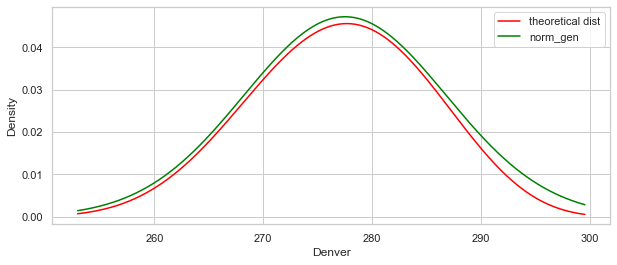

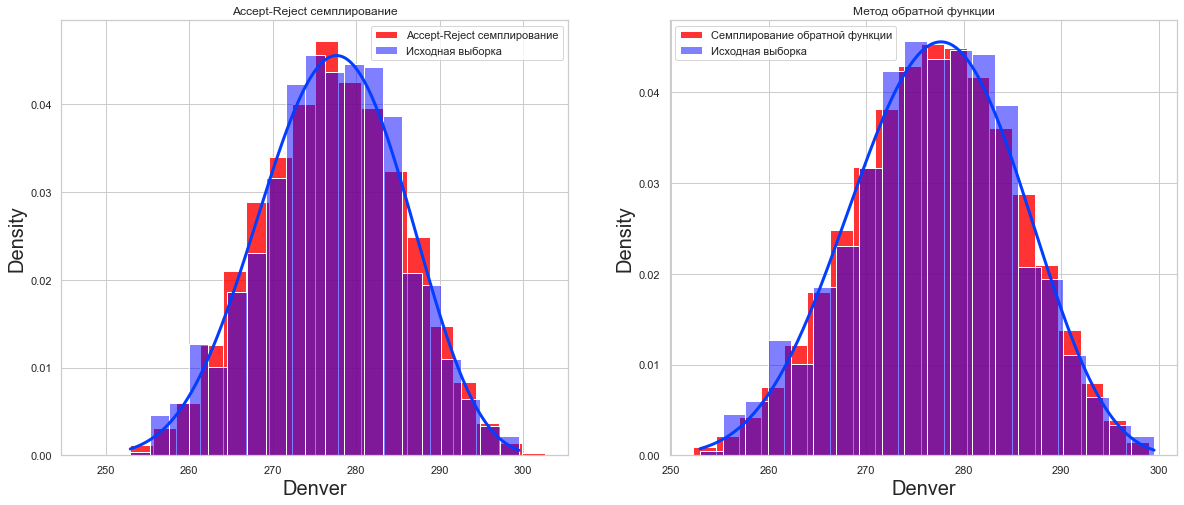

9139


In [460]:
array = df.Denver
distribution = scipy.stats.beta
args = argss(array, distribution)

mu = 277.5
k = 9.3
M = 1.1
samples, vals = inverse(array, distribution, args, k, M, mu, 'Denver')
#print(samples)
#print(vals)
#qqplot(array, samples, vals, 'Denver')


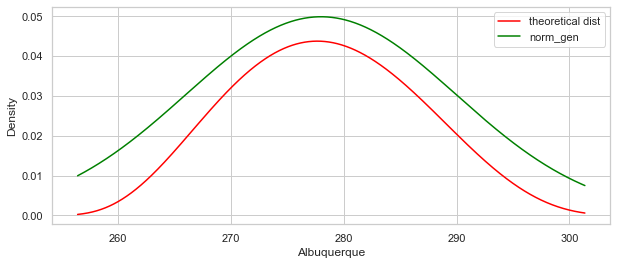

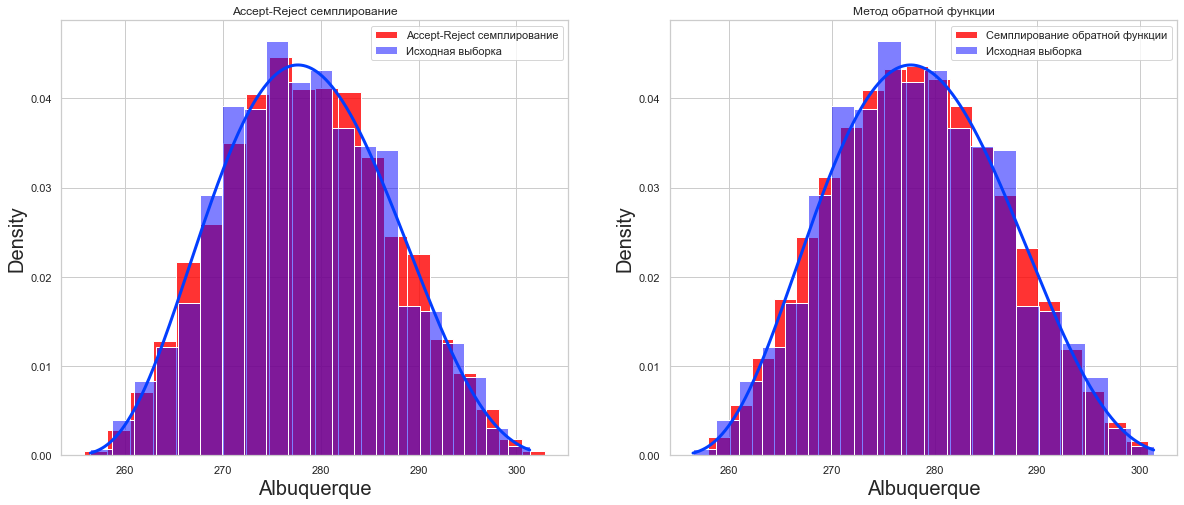

6648


In [461]:
array = df.Albuquerque
distribution = scipy.stats.johnsonsb
args = argss(array, distribution)

mu = 278
k = 12
M = 1.5
samples, vals = inverse(array, distribution, args, k, M, mu, 'Albuquerque')
#print(samples)
#print(vals)
#qqplot(array, samples, vals, 'Denver')


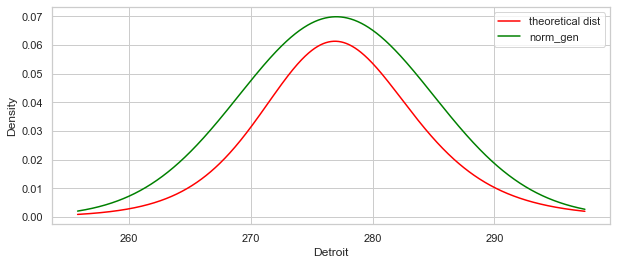

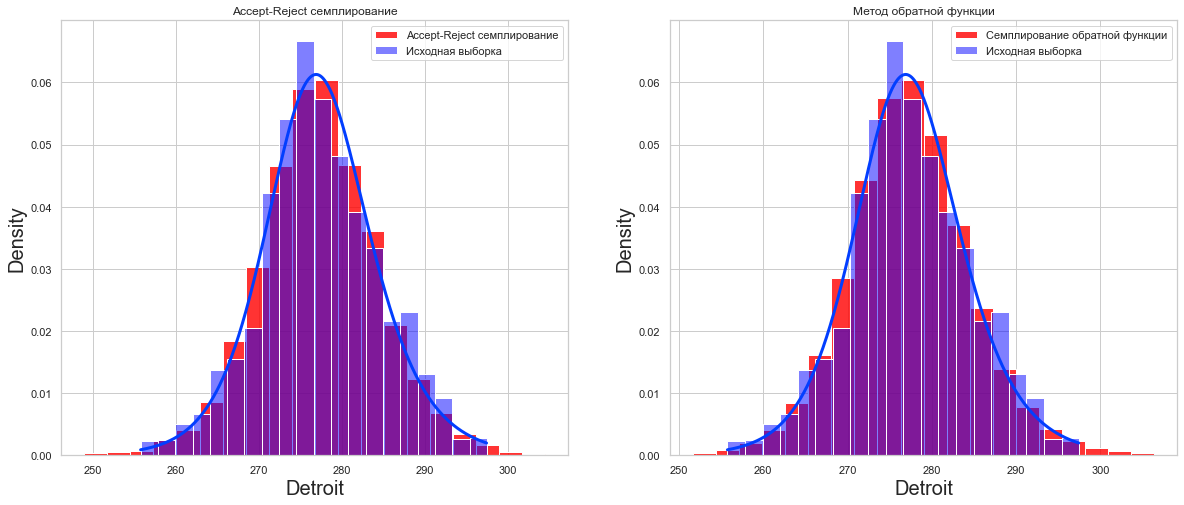

7111


In [462]:
array = df.Detroit
distribution = scipy.stats.genlogistic
args = argss(array, distribution)

mu = 277
k = 8
M = 1.4
samples, vals = inverse(array, distribution, args, k, M, mu, 'Detroit')
#print(samples)
#print(vals)
#qqplot(array, samples, vals, 'Denver')
